# Машинное обучение, DS-поток, осень 2022
## Задание 3.2


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 4 баллов;
* Задача 2 &mdash; 3 баллов;
* Задача 3 &mdash; 12 баллов.

----

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2')

### Задача 1

Пусть $X_1 , ..., X_n$ &mdash; выборка в пространстве $\mathbb{R}^D$ , а $Y_1, ..., Y_n$ &mdash; ее проекция на линейное подпространство размерности $d < D$. Докажите, что величина
$$\sum_{i=1}^{n} (X_i - Y_i)^2$$
минимальна, если $Y_1, ..., Y_n$ &mdash; проекция на линейное подпространство, образованное первыми $d$ главными компонентами. 

Чему она равна?

**Решение:**
Будем считать, что $\overline X = 0$, иначе переприсвоим $X_i = X_i - \overline X$.

Согласно семинару, мы строим метод PCA так, чтобы он, последовательно выбирая главные компоненты, максимизировал выборочную дисперсию вдоль каждой из них.

На $k$-ом шаге положим: $p_i^{(k)} = Pr_{a_k}X_i$

Таким образом, когда мы на каждом шаге максимизируем $D_k = \frac{1}{n}\sum_{i=1}^{n}|p_i^{(k)}|^2$ - выборочную дисперсию вдоль очередной главной компоненты $a_k$ (учитывая что мы действуем жадно и $D_1$ будет больше других $D_k$), мы в конечном итоге максимизируем $\frac{1}{n}\sum_{i=1}^{n}|Y_i|^2$ (поскольку $|Y_i|^2 = \sum_{k=1}^{d}|p_i^{(k)}|^2$ в силу перпендикулярности главных компонент), а значит минимизируем $\sum_{i=1}^{n}|X_i - Y_i|^2$ по теореме Пифагора.

В свою очередь (первый переход следует из того, что центр тяжести $\overline X = 0$):

$\sum_{i=1}^{n}|X_i - Y_i|^2 = \sum_{i=1}^{n}|X_i|^2 - \sum_{i=1}^{n}|Y_i|^2 = \sum_{i=1}^{n}|X_i|^2 - \sum_{i=1}^{n}\sum_{k=1}^{d}|p_i^{(k)}|^2 = \sum_{i=1}^{n}|X_i|^2 - \sum_{k=1}^{d}\sum_{i=1}^{n}|p_i^{(k)}|^2 = \sum_{i=1}^{n}|X_i|^2 - \sum_{k=1}^{d}D_k$, 

---
### Задача 2

Fashion-MNIST — набор данных изображений одежды, обуви и аксессуаров, состоящий из обучающего набора из 60 000 изображений и тестового набора из 10 000 изображений. Каждое изображение имеет размер 28x28 пикселей в оттенках серого.

Скачайте <a href="https://github.com/zalandoresearch/fashion-mnist">репозиторий</a> и загрузите данные с помощью скрипта `utils/mnist_reader.py`.

In [3]:
sys.path.insert(0, '/Users/nikitanikitin/Mipt/AD/5sem/ml/task2/fashion-mnist/utils')
import mnist_reader

X_train, y_train = mnist_reader.load_mnist(
    'fashion-mnist/data/fashion', kind='train'
)
X_test, y_test = mnist_reader.load_mnist(
    'fashion-mnist/data/fashion', kind='t10k'
)

Объединим все данные и зададим названия классов

In [4]:
data = np.array(np.vstack([X_train, X_test]), dtype=np.float64) / 255.0
target = np.hstack([y_train, y_test])
classes = [
    'Футболки/топы',
    'Брюки',
    'Свитеры',
    'Платья',
    'Пальто',
    'Сандалии',
    'Рубашки',
    'Кроссовки',
    'Сумки',
    'Сапоги'
]

Посмотрите на размер данных и напечатайте несколько изображений

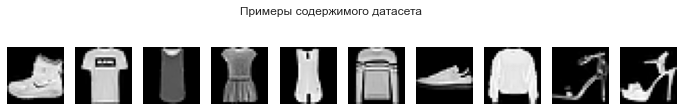

In [5]:
plt.figure(figsize=(12, 2))    
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(data[i].reshape((28, 28)), cmap='gray')
    plt.axis('off')
    plt.suptitle("Примеры содержимого датасета")

In [6]:
target[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

UMAP для сжатия в двумерное пространство. Не забывайте про особенности моделей и про смысл их гиперпараметров.

In [7]:
# !{sys.executable} -m pip install setuptools==59.8.0
# !{sys.executable} -m pip install umap-learn
from sklearn.decomposition import PCA
from umap.umap_ import UMAP

**Исправление:** подберем параметры на подвыборке

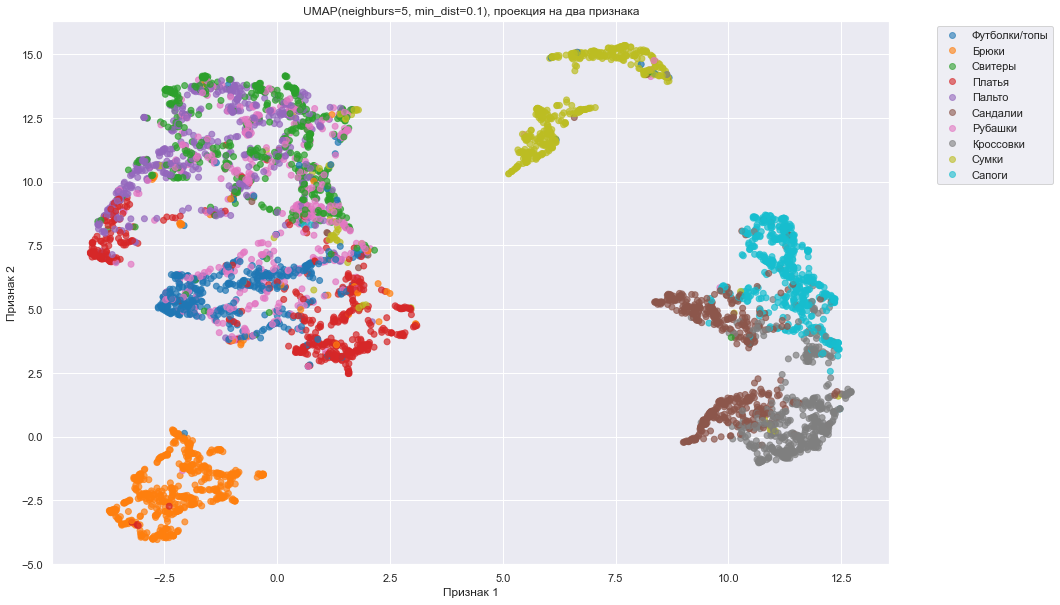

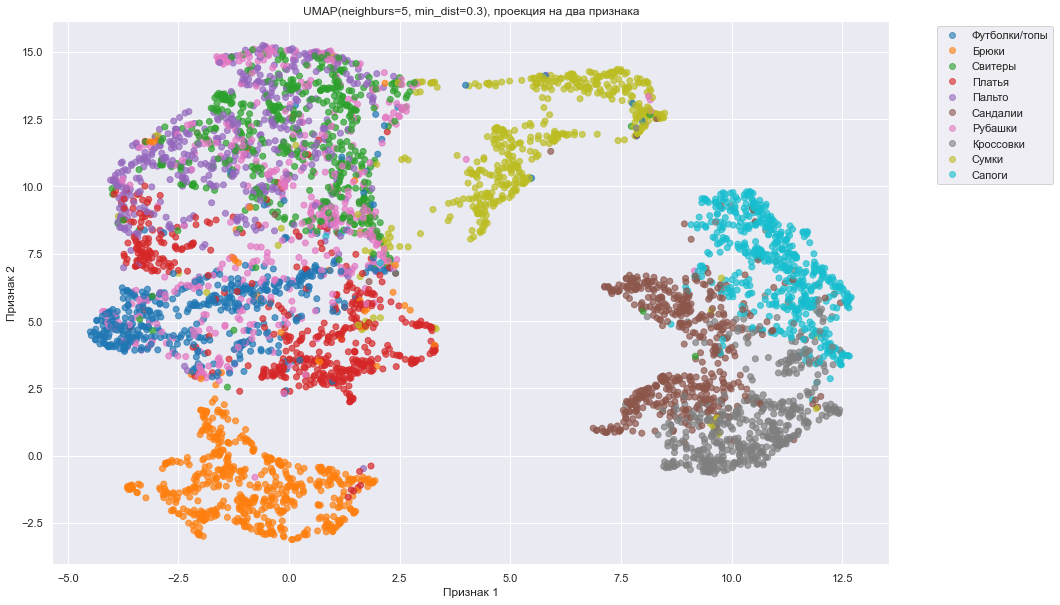

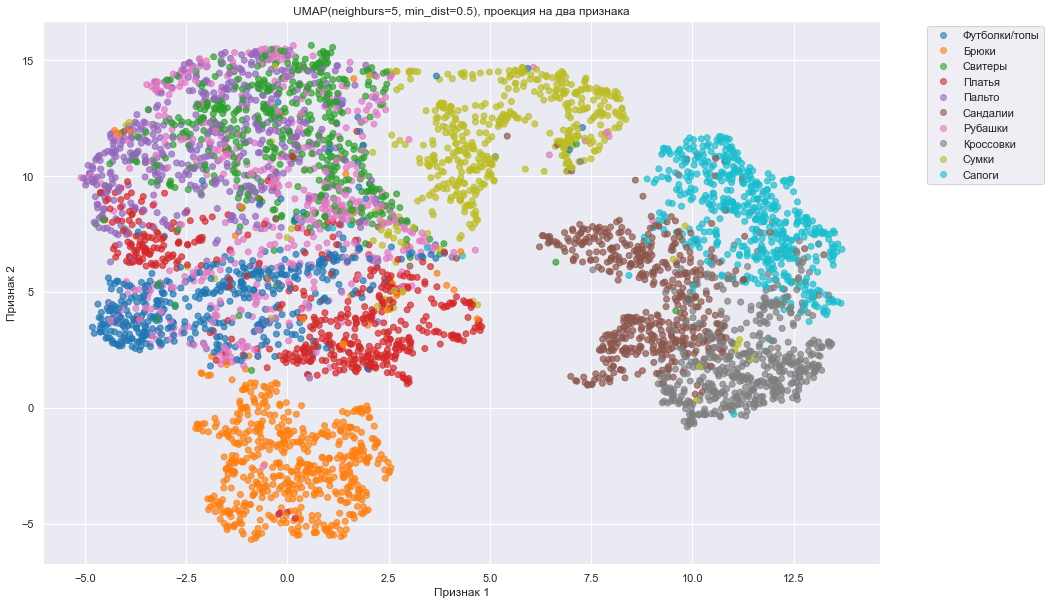

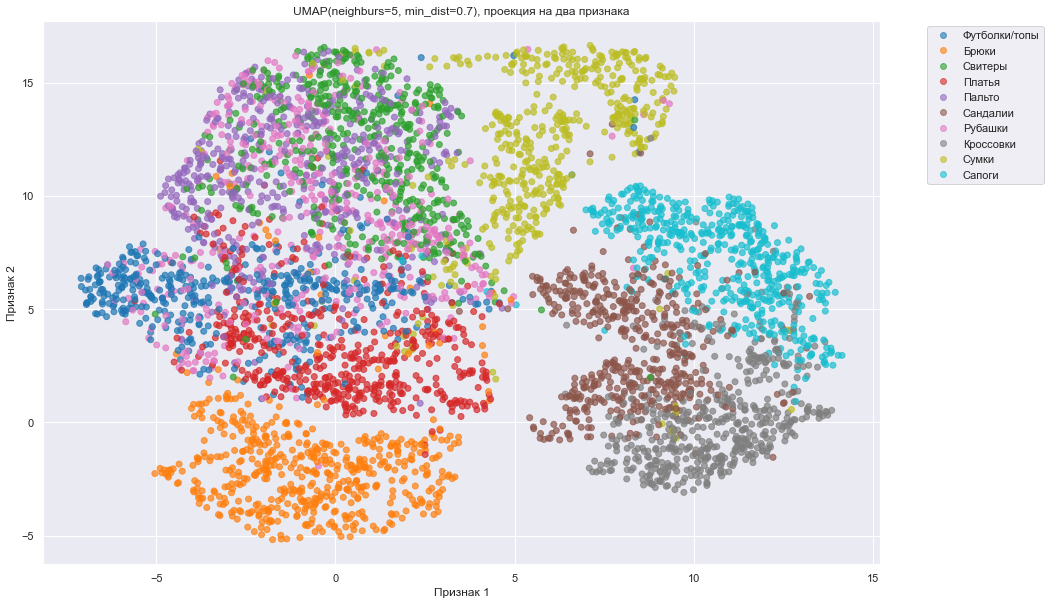

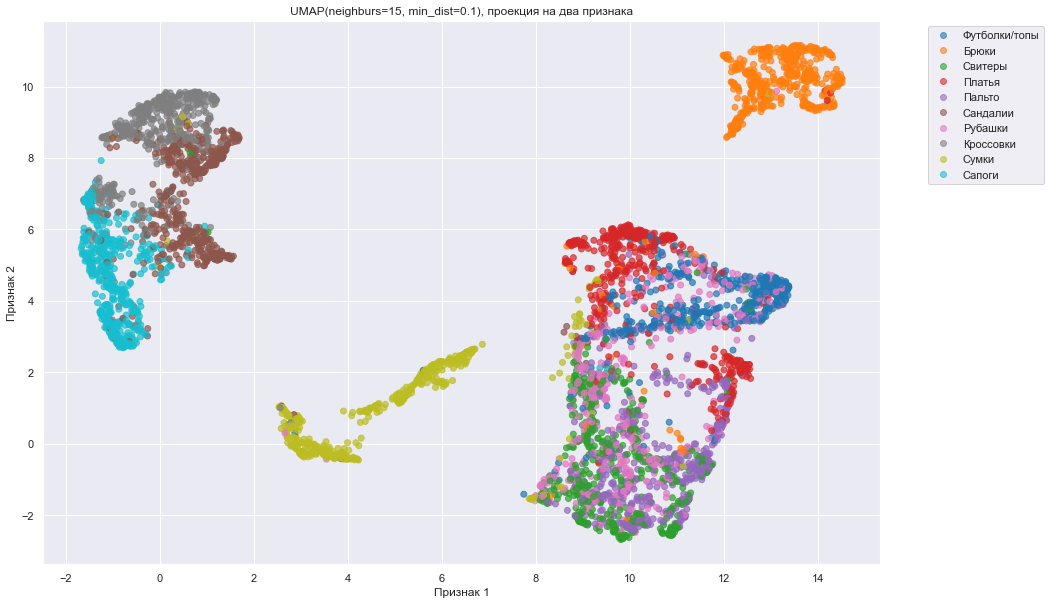

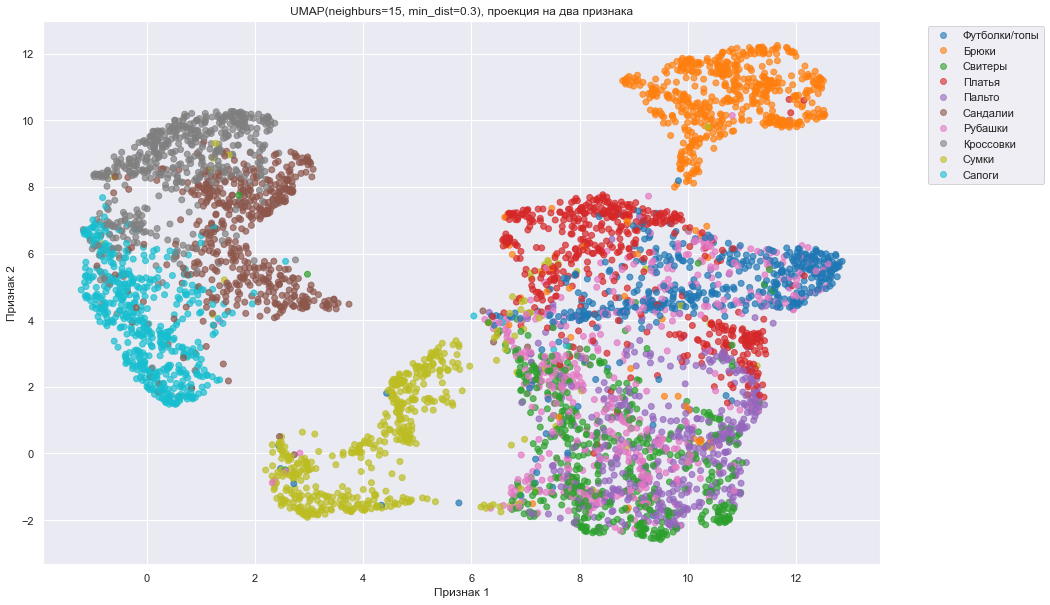

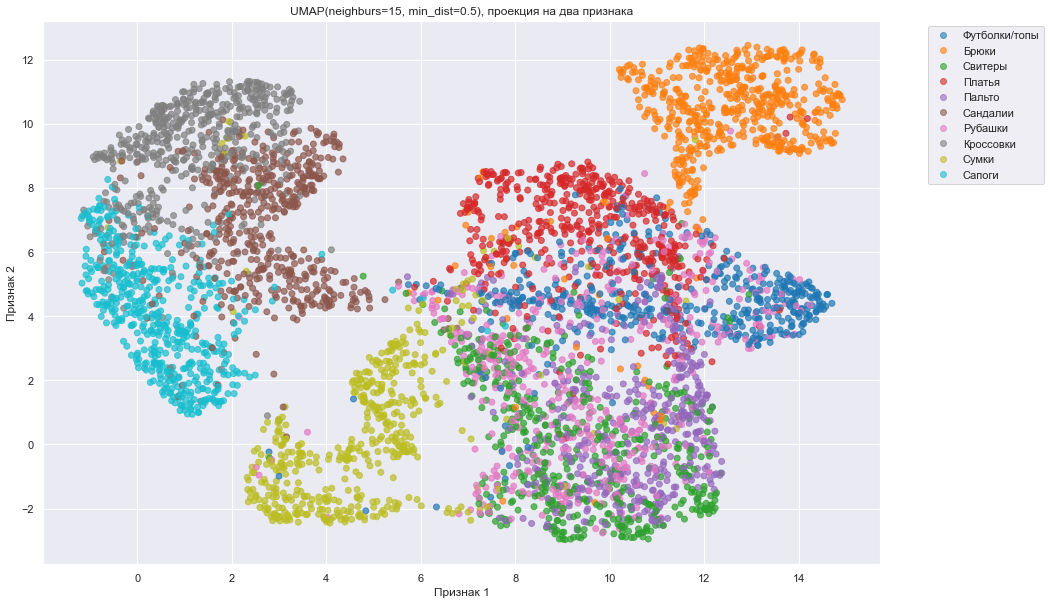

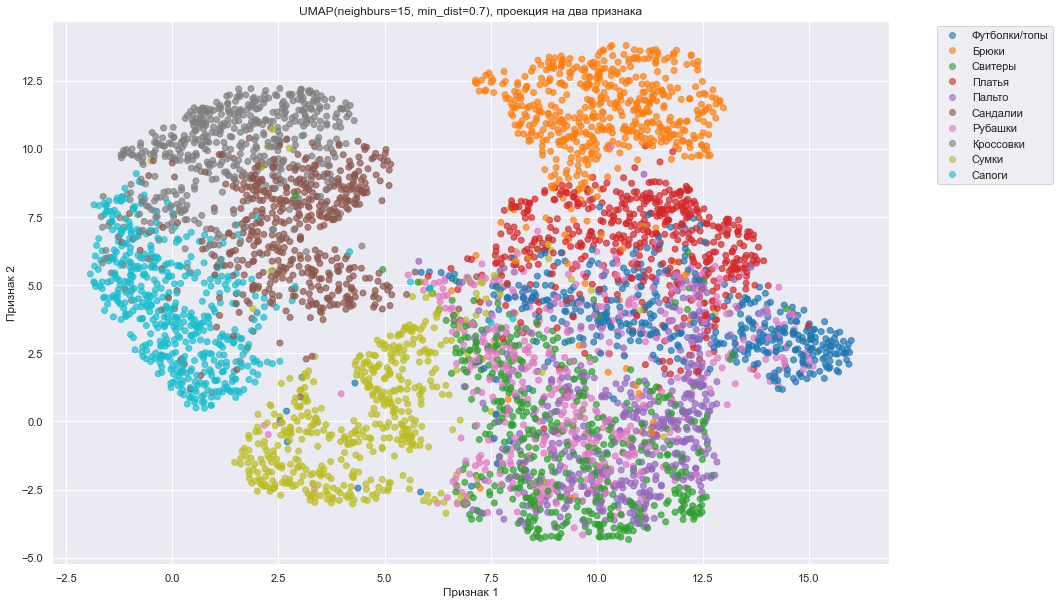

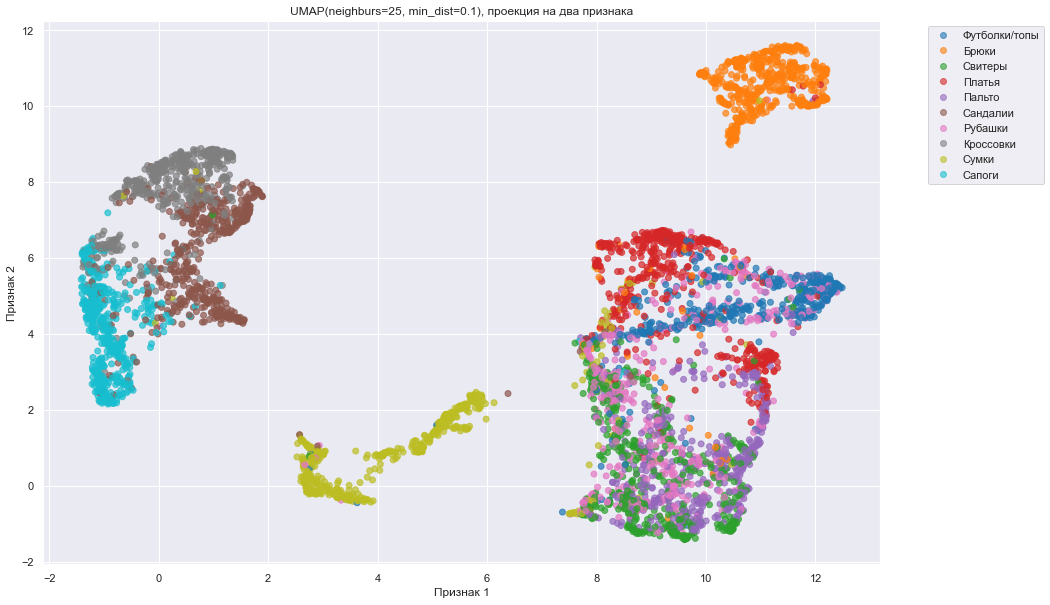

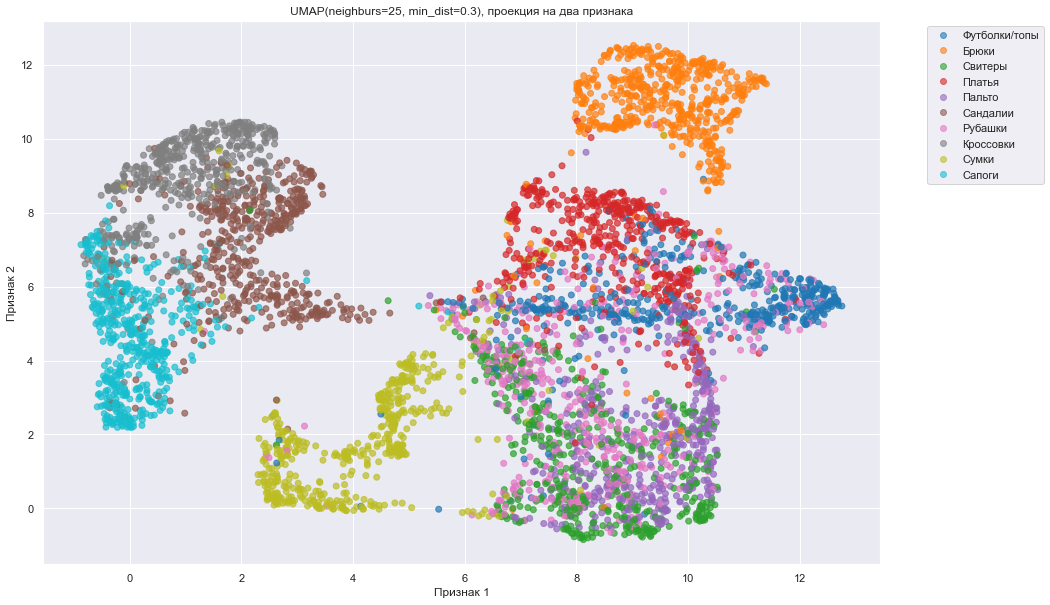

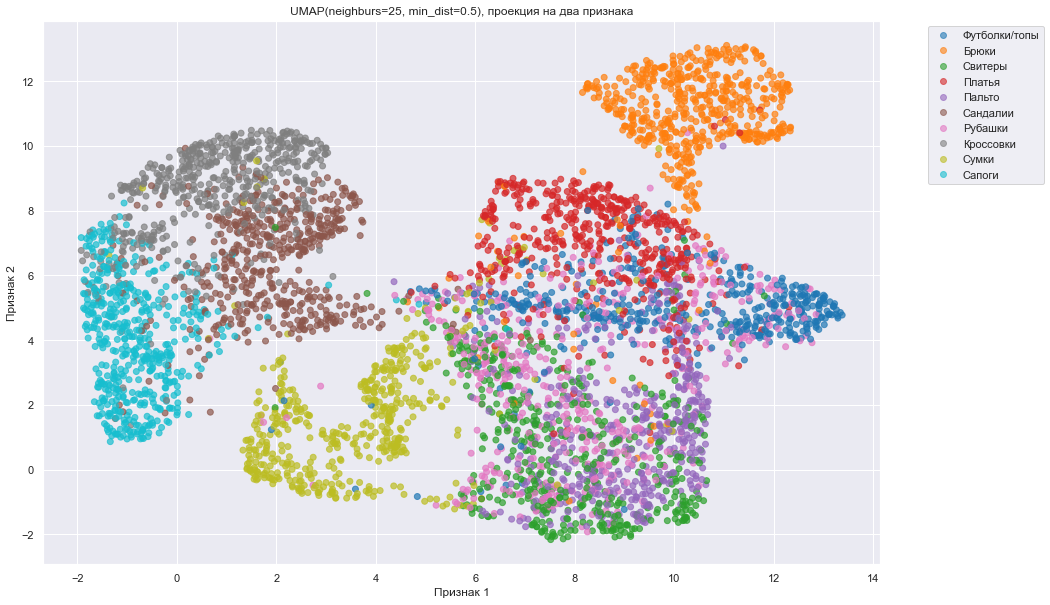

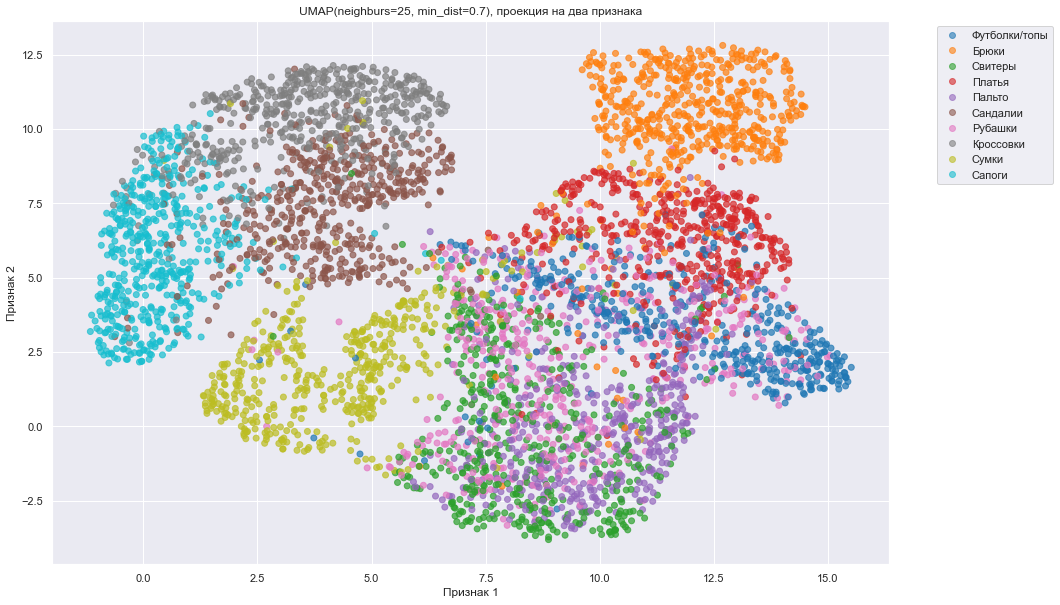

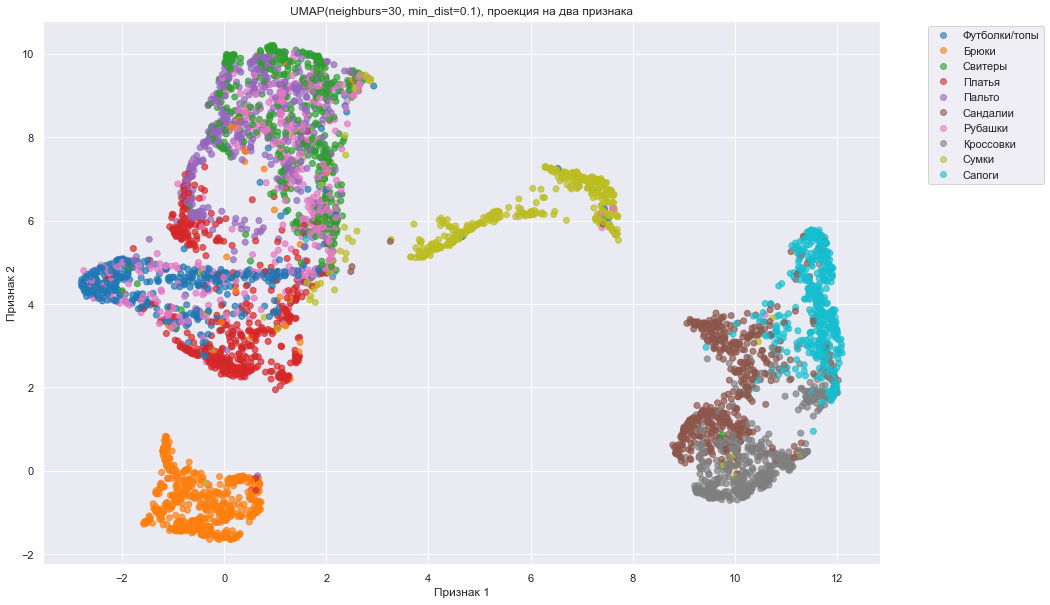

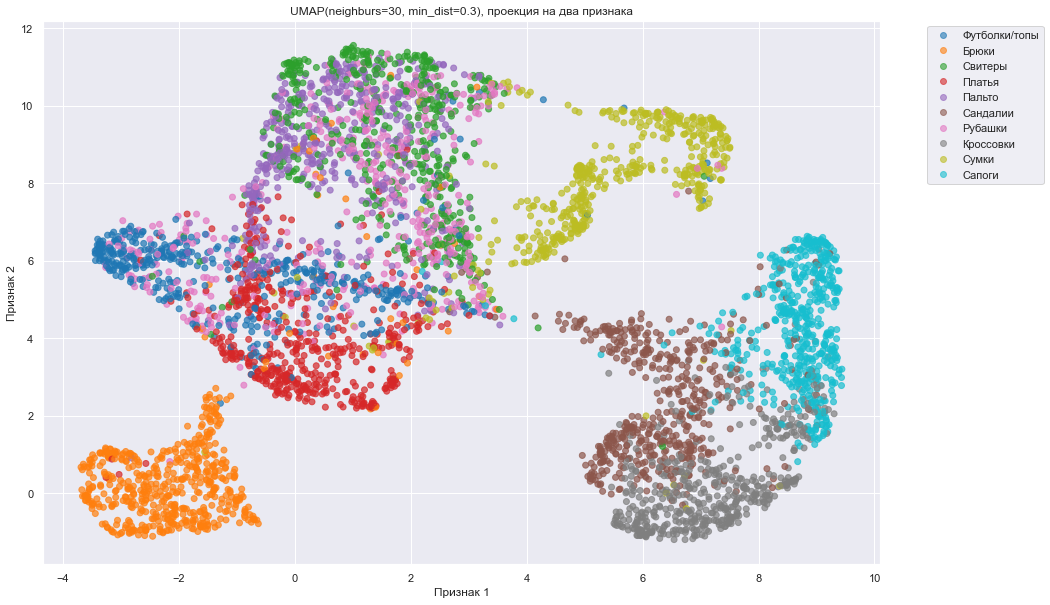

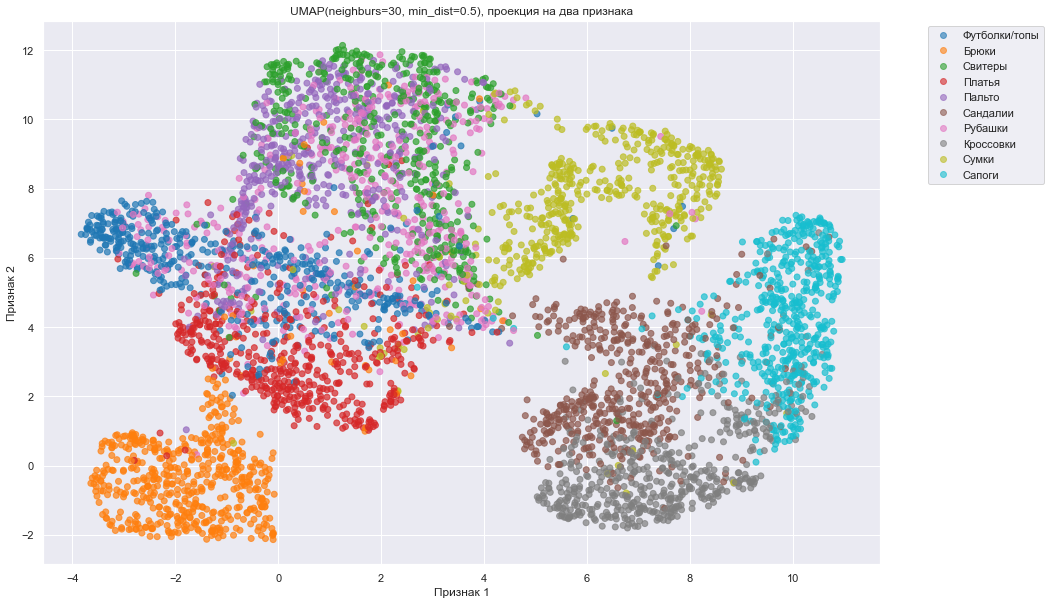

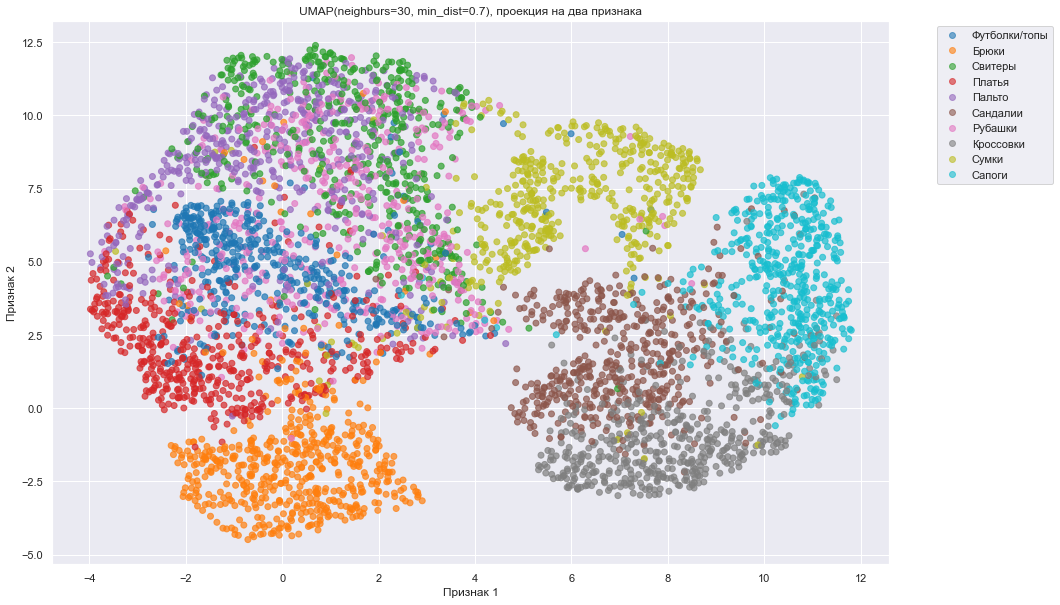

In [66]:
size = 5000
import itertools
for n_neighbors, min_dist in itertools.product([5, 15, 25, 30], [0.1, 0.3, 0.5, 0.7]):
    
    model = UMAP(n_components=2, random_state=2, n_neighbors=n_neighbors, min_dist=min_dist)
    data_2dim = model.fit_transform(data[:size])
    
    plt.figure(figsize=(15, 10))
    sc = plt.scatter(data_2dim[:, 0], data_2dim[:, 1], c=target[:size], alpha=0.7, cmap='tab10')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.title(f"UMAP(neighburs={n_neighbors}, min_dist={min_dist}), проекция на два признака")
    handles, labels = sc.legend_elements(alpha=0.6)
    plt.legend(handles, classes, bbox_to_anchor=(1.05, 1), loc=2)
    plt.show()


- Чем больше $n\_neighbours$, тем больше алгоритм фокусируется на глобальной структуре.
- Чем меньше $min\_dist$, тем более раздельными получаются компоненты 

**Выберем: $n\_neighbors=30, min\_dist=0.5$**

In [69]:
size = -1
model = UMAP(n_components=2, n_neighbors=30, min_dist=0.5, random_state=2)
data_2dim = model.fit_transform(data[:size])

Визуализируйте полученные результаты. В качестве цвета точки используйте ее класс. Не забудьте добавить легенду или colorbar.

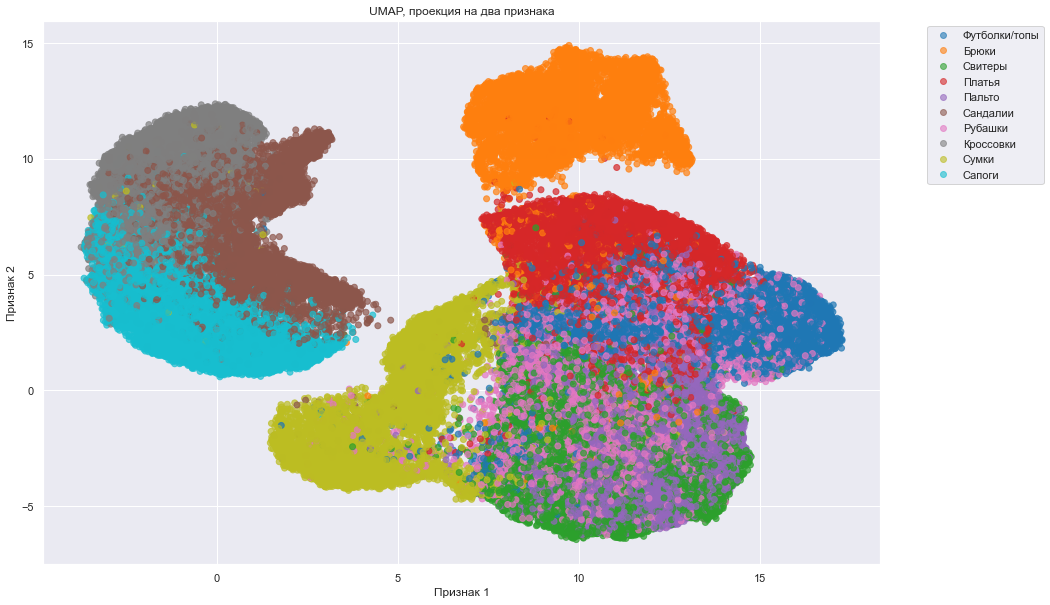

In [70]:
plt.figure(figsize=(15, 10))
sc = plt.scatter(data_2dim[:, 0], data_2dim[:, 1], c=target[:size], alpha=0.7, cmap='tab10')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title("UMAP, проекция на два признака")
handles, labels = sc.legend_elements(alpha=0.6)
plt.legend(handles, classes, bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

Проинтерпретируйте полученные результаты. Удалось ли выделить кластеры? Что можно сказать про взаиморасположение кластеров в двумерном пространстве?

**Вывод:** не получается разделять рубашки, пальто, свиттеры и т.п.
Успешно разделены предметы классы одежды: обуви, сумки, брюки и одежда выше пояса. В рамках обуви также неплохо выделены сандалии, сапоги и кроссовки. Кластеры тем ближе, чем более похожи объекты друг на друга.

Обучите UMAP, передав ему также метки классов, и визуализируйте результаты. Как изменились результаты?

**Исправлено:** просто переданы метки классов, согласно комментарию к решению.

In [80]:
model = UMAP(n_components=2, n_neighbors=30, min_dist=0.2, random_state=2)
target_data = target.reshape((70000, 1))
data_2dim = model.fit_transform(np.hstack([data, target_data]))

Визуализируем

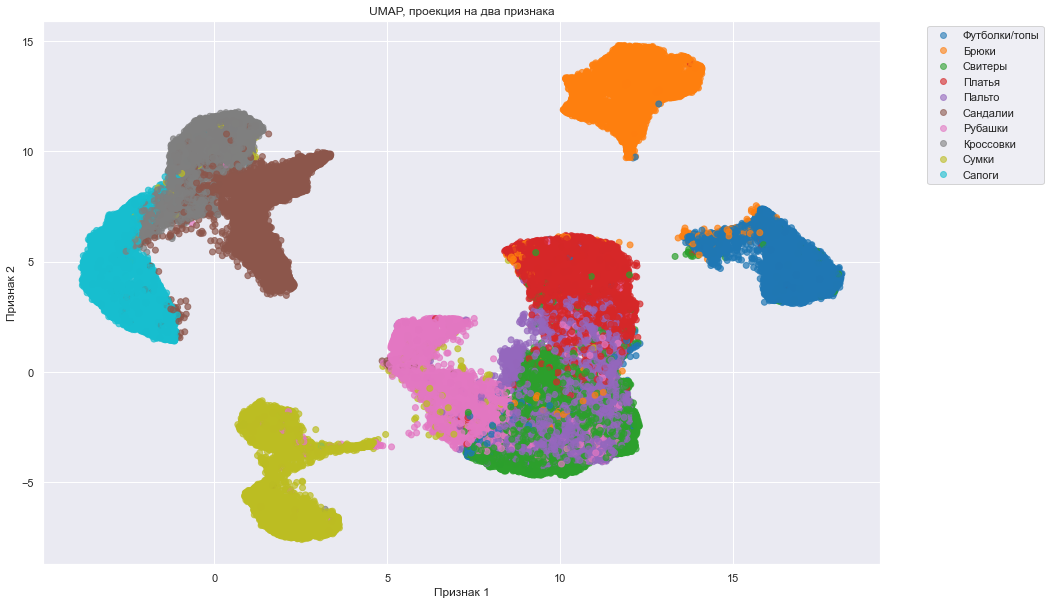

In [81]:
plt.figure(figsize=(15, 10))
sc = plt.scatter(data_2dim[:, 0], data_2dim[:, 1], c=target, alpha=0.7, cmap='tab10')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title("UMAP, проекция на два признака")
handles, labels = sc.legend_elements(alpha=0.6)
plt.legend(handles, classes, bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

**Вывод:** добавление категориального признака улучшило кластеризацию, но пальто и свитеры до сих пор неотличимы в кластере одежды выше пояса.

---
### Задача 3

Рассмотрим датасет **Leaf Classification**:
	
https://www.kaggle.com/c/leaf-classification
	
Данные содержат 1584 изображений образцов листьев (16 изображений для 99 видов). По ссылке доступно подробное описание данных. Для вашего удобства размер	некоторых изображении был изменен, в результате чего все изображения имеют одинаковый размер $170 \times 250$. 
* Скачайте файл с данными на сайте курса.
* Загрузите все изображения с помощью `plt.imread` и визуализируйте некоторые из них. Каждое изображение &mdash; матрица размера $170 \times 250$.
* В файле `train_labels.csv` указаны номера образцов листьев, которые относятся к обучающей части данных, а так же их виды. Разделите данные на обучающую и тестовую часть.
* На обучающей части данных постройте 30 главных компонент. Какую долю дисперсии данных они объясняют? Какую долю дисперсии объясняет каждая компонента отдельно?
* Визуализируйте главные компоненты. Можете ли вы их как-то охарактеризовать?
* Визуализируйте обучающую часть данных в проекции на две первых главных компоненты. Цвет точки должен соответствовать виду образца. Используйте `cmap=’Set1’` во избежании градации цвета по номеру вида. Наблюдаются ли какие-либо закономерности?
* Визуализируйте данные при помощи UMAP двумя способами — на основе исходных признаков (пиксели) и по проекциям на первые 30 главных компонент. Кластеризуются ли точки?


In [12]:
images = []
for i in range(1, 1585):
    images += [plt.imread(f"Leaf_Images/scaled_images/{i}.jpg").reshape(170*250)]
images = np.array(images)

In [13]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
temp = pd.read_csv('Leaf_Images/train_labels.csv')
train_ids = np.array(temp["id"])
train_target = np.array(temp["species"])
train_target_numbers = np.squeeze(encoder.fit_transform(train_target.reshape(-1, 1)))
train_images = [images[i - 1] for i in train_ids]

In [14]:
test_ids = np.array([x for x in range(1, 1585) if x not in train_ids])
test_images = np.array([images[i - 1] for i in test_ids])

Применяем метод PCA

In [15]:
pca = PCA(n_components=30)
print(f"{len(train_images)} images")
images_dim30 = pca.fit_transform(train_images)

990 images


Оценим результат:

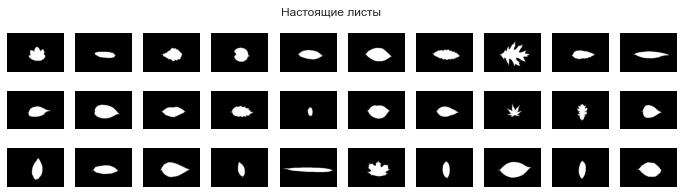

In [16]:
plt.figure(figsize=(12, 3))    
for i in range(30):
    plt.subplot(3, 10, i + 1)
    plt.imshow(train_images[i].reshape((170, 250)), cmap='gray')
    plt.axis('off')
plt.suptitle("Настоящие листы")
plt.show()

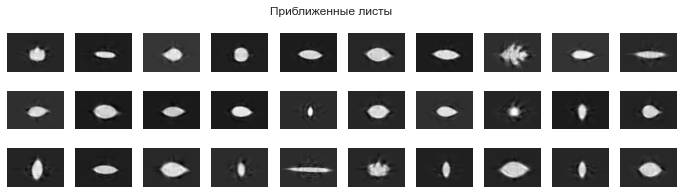

In [17]:
plt.figure(figsize=(12, 3))    
for i in range(30):
    X_hat = pca.inverse_transform(images_dim30[i])
    plt.subplot(3, 10, i + 1)
    plt.imshow(X_hat.reshape((170, 250)), cmap='gray')
    plt.axis('off')
plt.suptitle("Приближенные листы")
plt.show()

**Исправление:** оценим на тестовой.

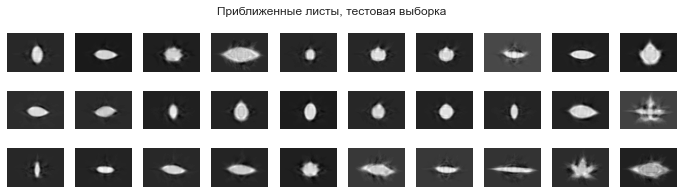

In [52]:
plt.figure(figsize=(12, 3))    
for i in range(30):
    X_hat = pca.inverse_transform(pca.transform(test_images[i].reshape(1, -1)))
    plt.subplot(3, 10, i + 1)
    plt.imshow(X_hat.reshape((170, 250)), cmap='gray')
    plt.axis('off')
plt.suptitle("Приближенные листы, тестовая выборка")
plt.show()

Считаем долю объясненной дисперсии\
**Исправление:** Правильная формула подсчёта СЗ.

In [42]:
import scipy as sp
values = np.square(sp.linalg.svdvals(X_train))
values.shape

(784,)

In [43]:
print('Объясненная доля дисперсии', values[0:30].sum() / values.sum() * 100, '%')
for i in range(30):
    print(i, "компонента:", values[i] / values.sum() * 100, '%')

Объясненная доля дисперсии 92.43642687797546 %
0 компонента: 68.13827157020569 %
1 компонента: 8.19145068526268 %
2 компонента: 3.4639954566955566 %
3 компонента: 2.261536940932274 %
4 компонента: 1.6416223719716072 %
5 компонента: 1.4604710042476654 %
6 компонента: 0.9891469962894917 %
7 компонента: 0.8474119938910007 %
8 компонента: 0.587846664711833 %
9 компонента: 0.5540190730243921 %
10 компонента: 0.429749907925725 %
11 компонента: 0.389512674883008 %
12 компонента: 0.32364162616431713 %
13 компонента: 0.2786949975416064 %
14 компонента: 0.2642125589773059 %
15 компонента: 0.25315447710454464 %
16 компонента: 0.24468821939080954 %
17 компонента: 0.22191856987774372 %
18 компонента: 0.193113146815449 %
19 компонента: 0.192030961625278 %
20 компонента: 0.18322743708267808 %
21 компонента: 0.172112334985286 %
22 компонента: 0.16308503691107035 %
23 компонента: 0.15922959428280592 %
24 компонента: 0.15325710410252213 %
25 компонента: 0.14786473475396633 %
26 компонента: 0.14140607090

**Исправление:** построим график зависимости объяянённой доли дисперсии от количества главных компонент.

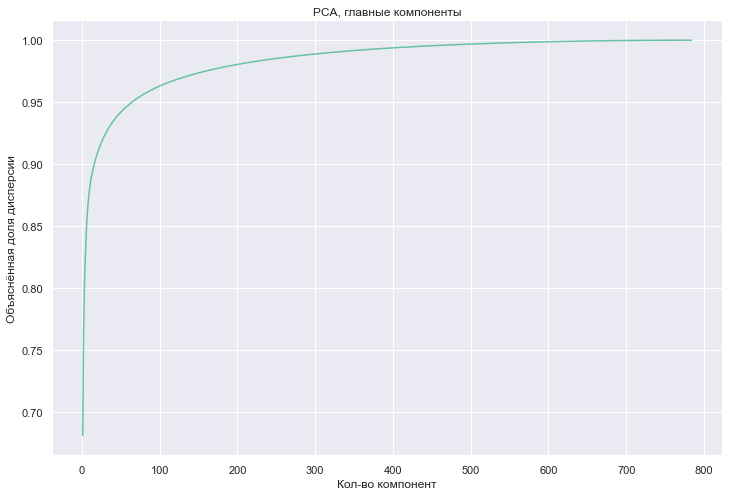

In [48]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()
ax.plot(1 + np.arange(values.shape[0]), values.cumsum() / values.sum())
ax.set_title("PCA, главные компоненты")
ax.set_xlabel("Кол-во компонент")
ax.set_ylabel("Объяснённая доля дисперсии");

Визуализируем среднее

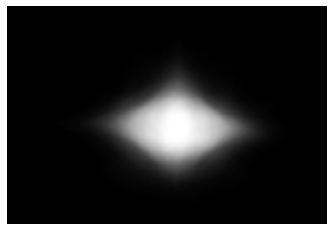

In [20]:
plt.imshow(pca.mean_.reshape((170, 250)), cmap='gray')
plt.axis('off')
plt.show()

Визуализируем главные компоненты

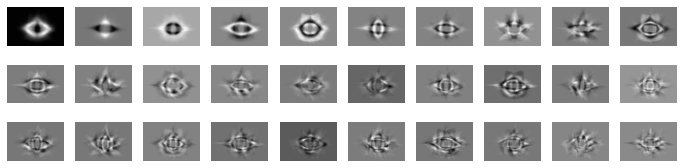

In [21]:
plt.figure(figsize=(12, 3))    
for i in range(30):
    plt.subplot(3, 10, i + 1)
    plt.imshow(pca.components_[i].reshape((170, 250)), cmap='gray')
    plt.axis('off')
plt.show()

PCA, проецируем на две компоненты

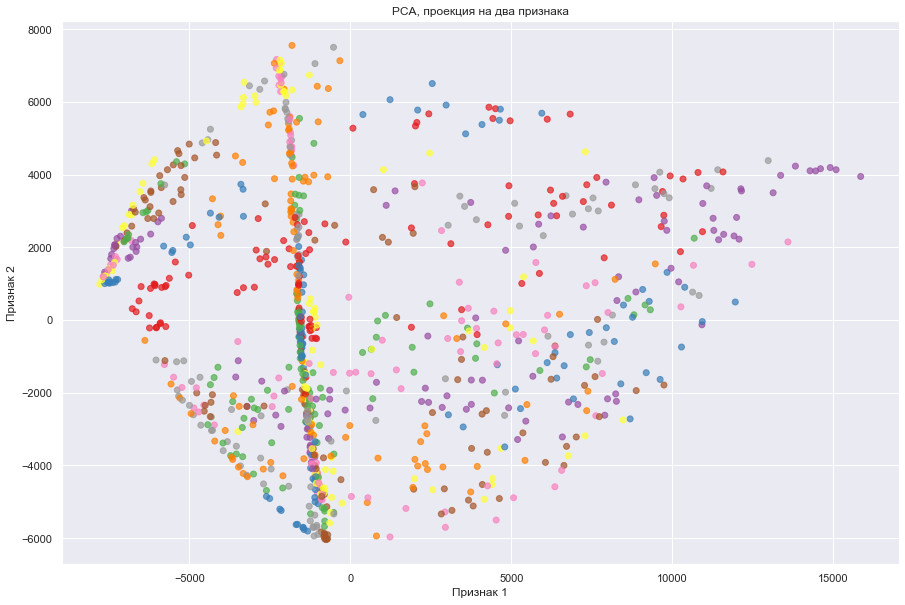

In [22]:
plt.figure(figsize=(15, 10))
sc = plt.scatter(images_dim30[:, 0],
                 images_dim30[:, 1],
                 c=train_target_numbers,
                 alpha=0.7, cmap='Set1')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title("PCA, проекция на два признака")
plt.show()

Видна прямая с наибольшей плотностью и кластеры по цветам, раположенные перпендикулярно ей (идущие от полюса к полюсу слева направо). Таким образом, возможно, существует некоторый признак 1 по всей выборке, который у большинства листьев(те, которые вдоль прямой) одинаков, вне зависимости от класса листа. А также есть признак 2, который в каждом классе листьев имеет малый разброс.

Учитывая компоненты, первый признак определяет темноту фона (вернее регулирует её по отношению ко второй компоненте, поэтому линия и наклонена), а второй горизонтальность или вертикальность листа, что соотносится с интуитивными гипотезами выше.

Теперь используем UMAP на всей выборке.

In [23]:
lst = list(train_ids)
colors = [(train_target_numbers[lst.index(i)] if i in lst else 100) for i in range(1, 1585)]

In [24]:
simple_model = UMAP(n_neighbors=150, min_dist=0.01, n_components=2, random_state=1)
images_2dim = simple_model.fit_transform(images)

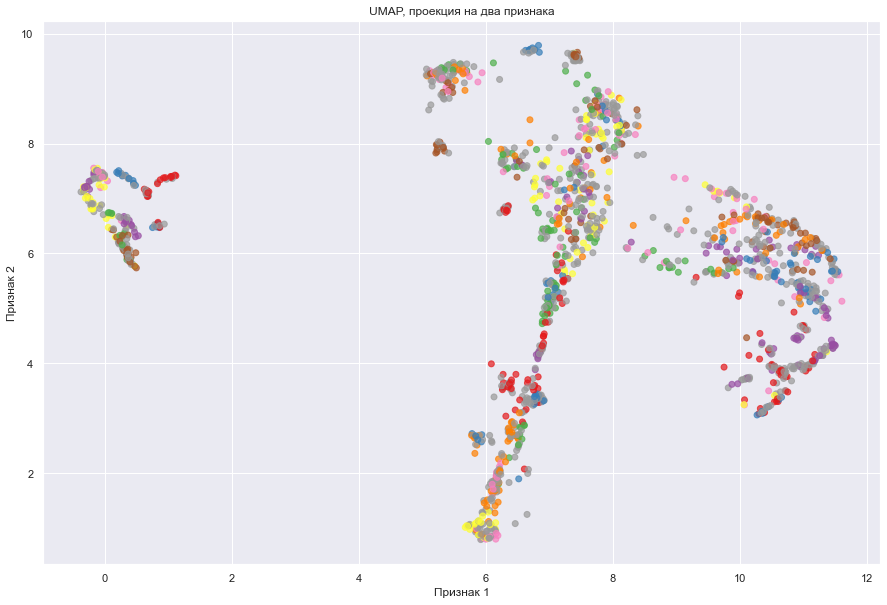

In [25]:
plt.figure(figsize=(15, 10))
sc = plt.scatter(images_2dim[:, 0], images_2dim[:, 1], alpha=0.7, c=colors, cmap='Set1')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title("UMAP, проекция на два признака")
plt.show()

Теперь используем предобработку с помощью PCA

In [26]:
umap_pca_model = UMAP(n_neighbors=150, min_dist=0.01, n_components=2, random_state=1)
images_2dim = umap_pca_model.fit_transform(pca.transform(images))

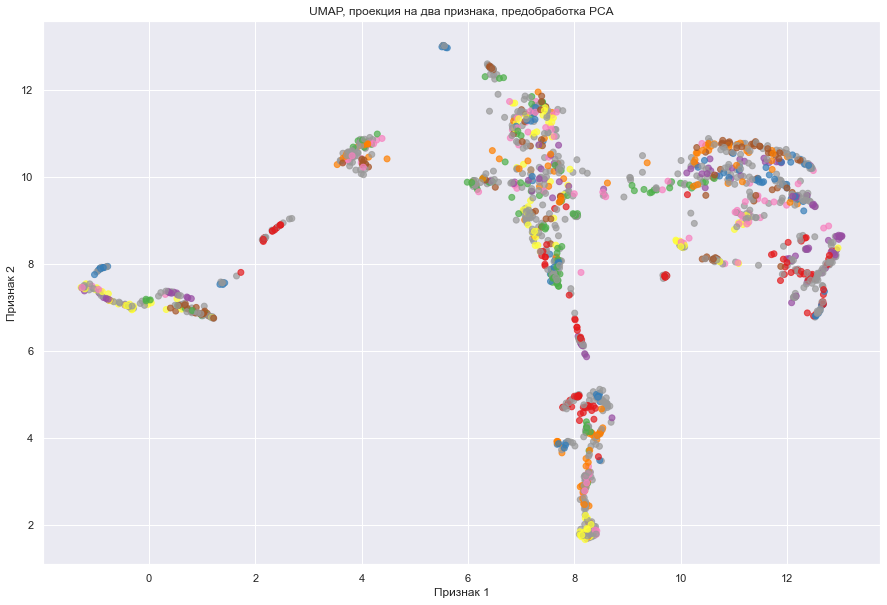

In [27]:
plt.figure(figsize=(15, 10))
sc = plt.scatter(images_2dim[:, 0], images_2dim[:, 1], alpha=0.7, c=colors, cmap='Set1')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title("UMAP, проекция на два признака, предобработка PCA")
plt.show()

**Исправление-замечание:** в комментарии к решению меня просили проверить полученную кластеризацию на тестовой выборке. Это невозможно сделать по двум причинам: по скрипту задания мы **не строили кластеризатор/классификатор**, к тому же на тестовой выборке согласно скрипту задания не известны верные ответы. 

Чтобы хоть как-то исправить положение - я протестировал PCA-сжатие на тестовой выборке - это согласно скрипту сделать можно.

**Вывод:** предобработка PCA изменила результат работы UMAP в локальных окрестностях, но не изменила глобальную кластеризацию.
По сравнению с голым PCA в работе UMAP стала отчетливей видна структура креста, однако модель стала менее интерпретируема.
Видны небольшие кластеры одноцветных точек, но учитывая большое число классов и малое число данных, говорить о хорошей кластеризации по классу листов достаточно проблематично. С другой стороны, есть несколько больших кластеров, на первый взгляд независимых от цвета.